# 1. Import Library

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
### read datasets
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
### 標準化
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
### Onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1與池化層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), ######## 多加入一層卷積
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), ######## 多加入一層卷積
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層3與池化層3

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), ######## 多加入一層卷積
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu')) ###### 加深隱藏層
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [20]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=50, batch_size=300, verbose=1)
### 範例程式原本epoch為1，但課本說要用50，改了的結果跑了7個多小時，別輕舉妄動！！！

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 533s - loss: 1.2388 - acc: 0.5500 - val_loss: 1.1714 - val_acc: 0.5816
Epoch 2/50
40000/40000 [==============================] - 534s - loss: 1.1074 - acc: 0.6023 - val_loss: 1.0462 - val_acc: 0.6259
Epoch 3/50
40000/40000 [==============================] - 534s - loss: 0.9887 - acc: 0.6473 - val_loss: 0.9441 - val_acc: 0.6641
Epoch 4/50
40000/40000 [==============================] - 533s - loss: 0.9269 - acc: 0.6708 - val_loss: 0.8417 - val_acc: 0.7081
Epoch 5/50
40000/40000 [==============================] - 528s - loss: 0.8447 - acc: 0.7009 - val_loss: 0.8013 - val_acc: 0.7239
Epoch 6/50
40000/40000 [==============================] - 526s - loss: 0.7742 - acc: 0.7265 - val_loss: 0.8234 - val_acc: 0.7161
Epoch 7/50
40000/40000 [==============================] - 526s - loss: 0.7254 - acc: 0.7432 - val_loss: 0.7503 - val_acc: 0.7438
Epoch 8/50
40000/40000 [=======================

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

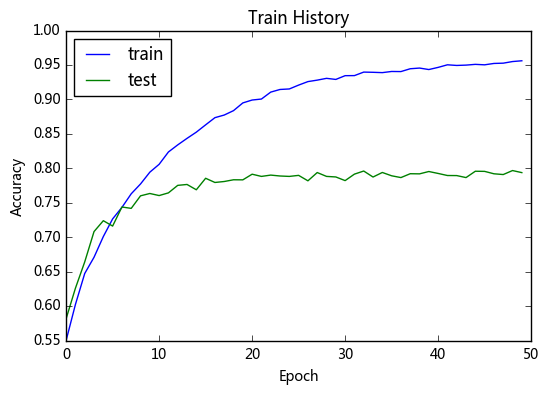

In [22]:
show_train_history('acc','val_acc')

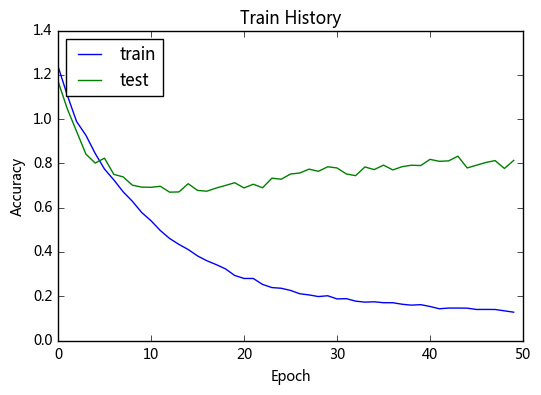

In [23]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.78820000000000001

# 進行預測

In [25]:
prediction=model.predict_classes(X_img_test_normalize)

10000/10000 [==============================] - 43s    


In [26]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 3, 6, 3, 9])

In [27]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

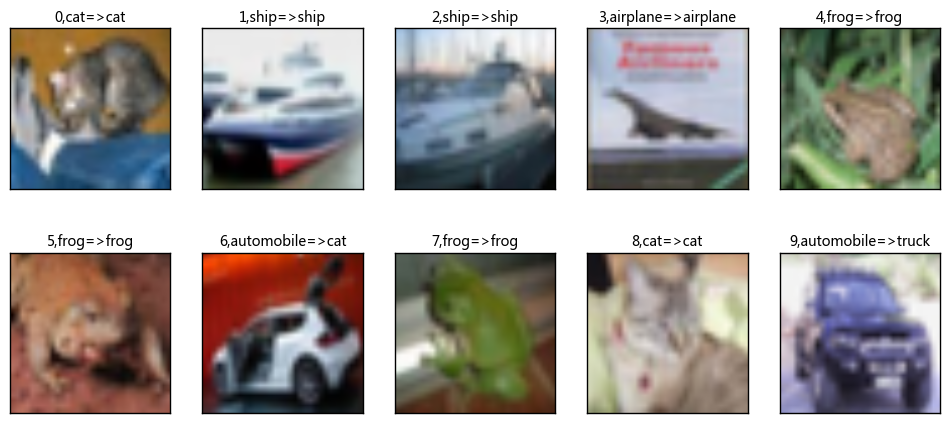

In [29]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [30]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [31]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

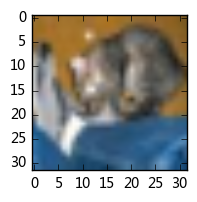

airplane Probability:0.000007394
automobile Probability:0.000000069
bird Probability:0.000091406
cat Probability:0.908961773
deer Probability:0.000000109
dog Probability:0.090665579
frog Probability:0.000088358
horse Probability:0.000004460
ship Probability:0.000178661
truck Probability:0.000002291


In [32]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

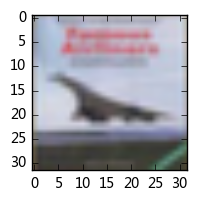

airplane Probability:0.910520315
automobile Probability:0.000005361
bird Probability:0.048420403
cat Probability:0.000057556
deer Probability:0.000024453
dog Probability:0.000000413
frog Probability:0.000000248
horse Probability:0.000014604
ship Probability:0.040943805
truck Probability:0.000012815


In [33]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Confusion Matrix

In [37]:
prediction.shape

(10000,)

In [38]:
### test data為二維資料
y_label_test.shape

(10000, 1)

In [39]:
### 因為pandas的crosstab的輸入必須都是一維陣列，所以將test data降維
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [40]:
######## 將交叉表轉換為百分比更直觀！
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict']).apply(lambda r: r/r.sum(),axis = 1)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,0.830,0.010,0.042,0.017,0.012,0.004,0.004,0.009,0.057,0.015
1,0.012,0.890,0.003,0.010,0.004,0.005,0.003,0.000,0.026,0.047
2,0.052,0.001,0.709,0.055,0.067,0.036,0.042,0.020,0.014,0.004
3,0.016,0.003,0.063,0.611,0.040,0.162,0.057,0.024,0.015,0.009
4,0.011,0.002,0.054,0.064,0.741,0.031,0.029,0.058,0.009,0.001
5,0.009,0.003,0.051,0.149,0.035,0.681,0.018,0.041,0.009,0.004
6,0.004,0.005,0.039,0.045,0.018,0.026,0.848,0.006,0.007,0.002
7,0.010,0.001,0.022,0.044,0.045,0.037,0.001,0.828,0.005,0.007
8,0.040,0.012,0.011,0.010,0.006,0.006,0.003,0.003,0.899,0.010


# Save model to JSON

In [34]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [35]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [36]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
